<a href="https://colab.research.google.com/github/hasmira0105/Public-repo/blob/main/4d_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount drive to collab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Preprocessing dataset and deploy apply image augmentation

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation = ImageDataGenerator(rescale=1/255)


training_dataset = train.flow_from_directory(
    '/content/drive/MyDrive/Dataset1/Train',
    target_size = (300, 300),
    batch_size = 50,
    class_mode = 'categorical'
)

validation_dataset = validation.flow_from_directory(
    '/content/drive/MyDrive/Dataset1/Validation',
    target_size = (300, 300),
    batch_size = 50,
    class_mode = 'categorical'
)

Found 2000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


Creating the model

In [3]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

Compile the model

In [4]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Train the dataset

In [5]:
history = model.fit(
    training_dataset,
    steps_per_epoch = 8,
    epochs = 200,
    verbose = 1,
    validation_data = validation_dataset,
    validation_steps = 2
)

Epoch 1/200
8/8 [==============================] - 220s 24s/step - loss: 17.2510 - accuracy: 0.1850 - val_loss: 4.4953 - val_accuracy: 0.3500
Epoch 2/200
8/8 [==============================] - 146s 19s/step - loss: 2.7355 - accuracy: 0.2375 - val_loss: 1.5582 - val_accuracy: 0.3300
Epoch 3/200
8/8 [==============================] - 100s 13s/step - loss: 1.5897 - accuracy: 0.2700 - val_loss: 1.5712 - val_accuracy: 0.3400
Epoch 4/200
8/8 [==============================] - 88s 11s/step - loss: 1.5638 - accuracy: 0.3600 - val_loss: 1.5108 - val_accuracy: 0.3200
Epoch 5/200
8/8 [==============================] - 65s 8s/step - loss: 1.5405 - accuracy: 0.2750 - val_loss: 1.4615 - val_accuracy: 0.3200
Epoch 6/200
8/8 [==============================] - 55s 7s/step - loss: 1.4726 - accuracy: 0.3550 - val_loss: 1.2862 - val_accuracy: 0.5200
Epoch 7/200
8/8 [==============================] - 46s 6s/step - loss: 1.3938 - accuracy: 0.4125 - val_loss: 1.2419 - val_accuracy: 0.5100
Epoch 8/200
8/8 [==

Checking the result

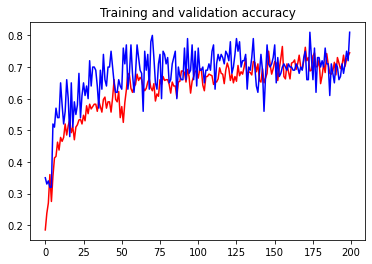

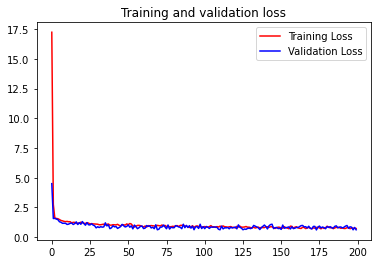

In [6]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [7]:
# Generate a Saved Model

tf.saved_model.save(model, '/content/drive/MyDrive/MY model/SavedModel')



FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: /content/drive/MyDrive/MY model/SavedModel/assets


In [8]:
# Convert the SavedModel to TFLite
import pathlib
converter = tf.lite.TFLiteConverter.from_saved_model('/content/drive/MyDrive/MY model/SavedModel')
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('tf.lite')
tflite_model_file.write_bytes(tflite_model)

349277140

In [12]:
# Download TFlite 
